In [28]:
using CSV
using DataFrames
using Dates
using Plots

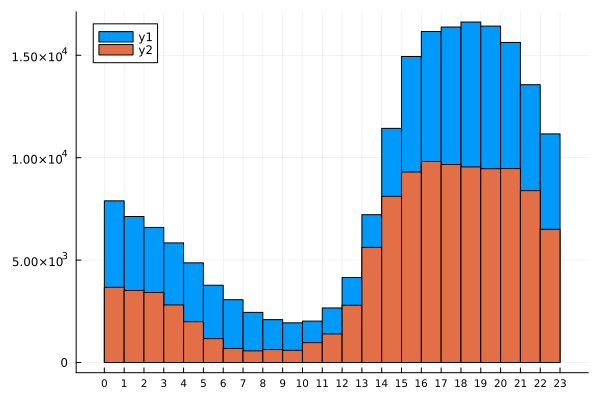

In [41]:
questionsData = CSV.File("questions.csv")
df = DataFrame(questionsData)
# parse into DateTime objects

datetime_vec = map(x -> DateTime(x, "yyyy-mm-dd HH:MM:SS"), df[!, "AskedOnUtc"])

# create a vector of hours from the DateTime objects
hour_vec = hour.(datetime_vec)
histogram(hour_vec, bins=0:23, xticks=0:23, xtickfont=7)

answerData = CSV.File("attorneytimeentries.csv")
df1 = DataFrame(answerData)
# parse into DateTime objects

datetime_vec_ans = map(x -> DateTime(x, "yyyy-mm-dd HH:MM:SS"), df1[!, "EnteredOnUtc"])

# create a vector of hours from the DateTime objects
hour_vec_ans = hour.(datetime_vec_ans)
histogram!(hour_vec_ans, bins=0:23, xticks=0:23, xtickfont=7)

